# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#Done
#pip install citipy


     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     --- ----------------------------------- 61.4/675.6 kB 1.7 MB/s eta 0:00:01
     -------------- ----------------------- 266.2/675.6 kB 2.7 MB/s eta 0:00:01
     ------------------------------ ------- 542.7/675.6 kB 3.4 MB/s eta 0:00:01
     -------------------------------------  665.6/675.6 kB 3.2 MB/s eta 0:00:01
     -------------------------------------  665.6/675.6 kB 3.2 MB/s eta 0:00:01
     -------------------------------------  665.6/675.6 kB 3.2 MB/s eta 0:00:01
     -------------------------------------  665.6/675.6 kB 3.2 MB/s eta 0:00:01
     -------------------------------------  665.6/675.6 kB 3.2 MB/s eta 0:00:01
     -------------------------------------  665.6/675.6 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency i

In [7]:
# Done
# Takes a while to load and fails at citipy - need to import
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
#Done
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Done
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?appid=8577a0611f7ea2e1585992afad33e2af&units=imperial&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop 
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    city_weather = requests.get(city_url).json() 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()  
        


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']  

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        print(city_url)
        pass

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | celestun
Processing Record 2 of Set 1 | olyokminsk
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | kawthoung
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?appid=8577a0611f7ea2e1585992afad33e2af&units=imperial&q=kawthoung
Processing Record 6 of Set 1 | fale old settlement
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | grants pass
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | kendari
Processing Record 12 of Set 1 | semibratovo
Processing Record 13 of Set 1 | glace bay
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | belmonte
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | kovdor
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | b

In [11]:
# Done
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [12]:
# Done
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,celestun,20.8667,-90.4000,81.75,66,2,13.91,MX,1712010905
1,olyokminsk,60.3736,120.4264,8.49,97,91,1.57,RU,1712010996
2,puerto natales,-51.7236,-72.4875,43.09,91,100,4.88,CL,1712010996
3,olonkinbyen,70.9221,-8.7187,22.26,57,100,12.33,SJ,1712010997
4,fale old settlement,-9.3852,-171.2468,85.15,73,26,13.27,TK,1712010998


In [13]:
# Done
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Done
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,celestun,20.8667,-90.4000,81.75,66,2,13.91,MX,1712010905
1,olyokminsk,60.3736,120.4264,8.49,97,91,1.57,RU,1712010996
2,puerto natales,-51.7236,-72.4875,43.09,91,100,4.88,CL,1712010996
3,olonkinbyen,70.9221,-8.7187,22.26,57,100,12.33,SJ,1712010997
4,fale old settlement,-9.3852,-171.2468,85.15,73,26,13.27,TK,1712010998


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

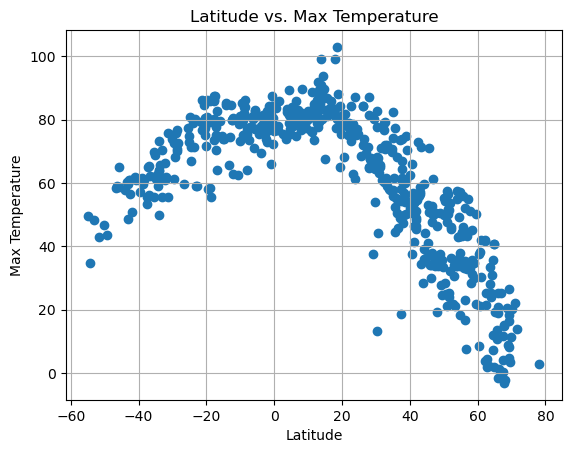

In [15]:
#Done
# Build scatter plot for latitude vs. temperature
#city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', title='Latitude vs. Max Temperature')
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
# Incorporate the other graph properties

plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

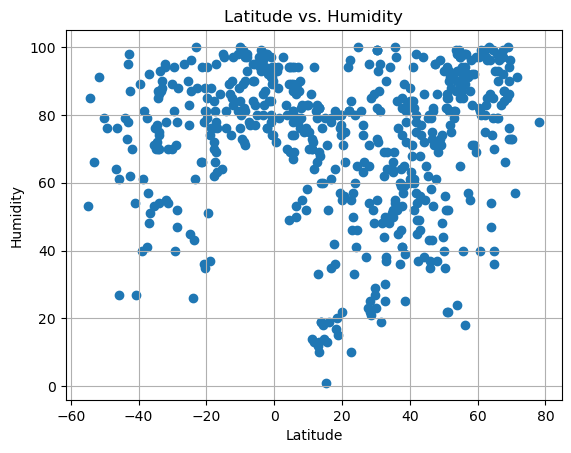

In [16]:
#Done
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

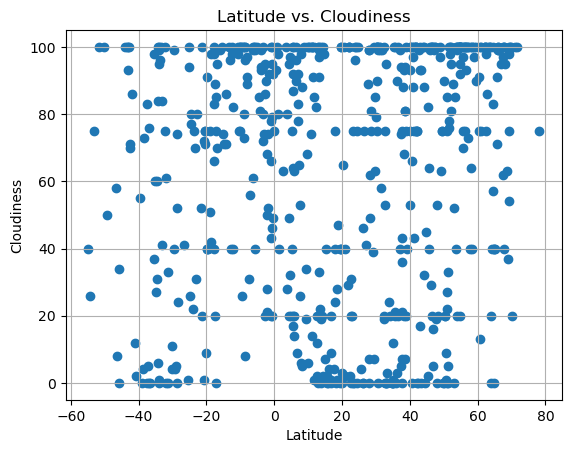

In [17]:
#Done
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

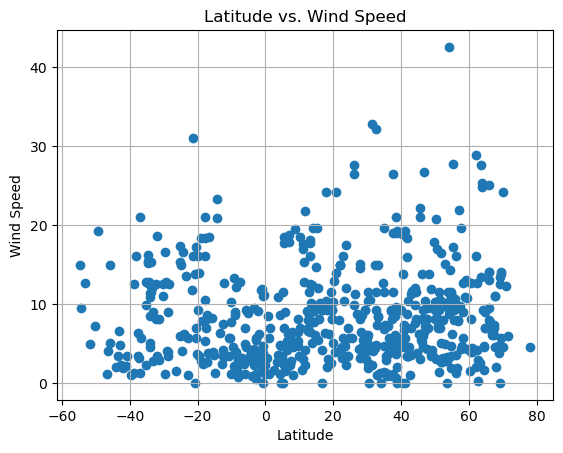

In [18]:
#Done
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
#Done
# Define a function to create Linear Regression plots
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

def linear_regression_plot(x, y, title='', xlabel='', ylabel='', regression_equation = ''):
    # Create the seaborn scatter plot
    sns.scatterplot(x=x, y=y)
    
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    type(intercept)

    #Round the regression parameters
    slope = round(slope, 2)
    intercept = round(intercept, 2)
    std_err = round(std_err, 2)
    r_value = round(std_err, 2)
    p_value = round(std_err, 2)
    
    #The regression equation (y =m*x + b)
    regression_equation = f"{intercept} = {slope}x+{std_err}"
    
    # Plot the regression line on the scatterplot 
    plt.plot(x, slope*x + intercept, color='red')
 
    
    #Display regression equation text
    #plt.annotate(regression_equation, (2,2), fontsize = 12, color = 'red')
    
    # Calculate the coordinates for bottom left position
    x_coord = min(x)
    y_coord = min(y)

    #Display regression equation text
    plt.annotate(regression_equation, (x_coord, y_coord), fontsize=8, color='red', ha='left', va='bottom')

    # Add labels and a title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
  
    # Show the scatter plot
    plt.show()

In [27]:
 #   x_mid = (max(x) + min(x)) / 2
 #   y_mid = (max(y) + min(y)) / 2
 #   plt.text(x_mid, y_mid, regression_equation, fontsize=12, ha='center')

In [28]:
#Done
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,celestun,20.8667,-90.4000,81.75,66,2,13.91,MX,1712010905
1,olyokminsk,60.3736,120.4264,8.49,97,91,1.57,RU,1712010996
3,olonkinbyen,70.9221,-8.7187,22.26,57,100,12.33,SJ,1712010997
5,college,64.8569,-147.8028,40.80,36,40,6.91,US,1712010882
6,grants pass,42.4390,-123.3284,72.77,37,0,4.61,US,1712010999


In [29]:
#Done
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto natales,-51.7236,-72.4875,43.09,91,100,4.88,CL,1712010996
4,fale old settlement,-9.3852,-171.2468,85.15,73,26,13.27,TK,1712010998
9,kendari,-3.9450,122.4989,77.16,93,94,2.89,ID,1712011000
12,grytviken,-54.2811,-36.5092,34.72,85,26,9.51,GS,1712010855
13,belmonte,-15.8631,-38.8828,79.59,86,99,8.23,BR,1712011001


###  Temperature vs. Latitude Linear Regression Plot

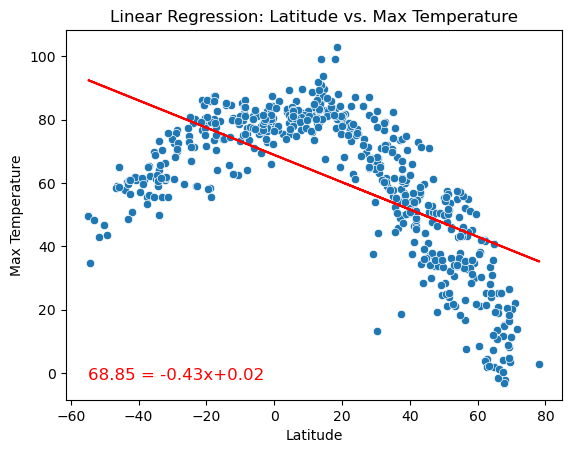

In [30]:
#Done
linear_regression_plot(city_data_df['Lat'], city_data_df['Max Temp'], 
                       title='Linear Regression: Latitude vs. Max Temperature', 
                       xlabel='Latitude', ylabel='Max Temperature')

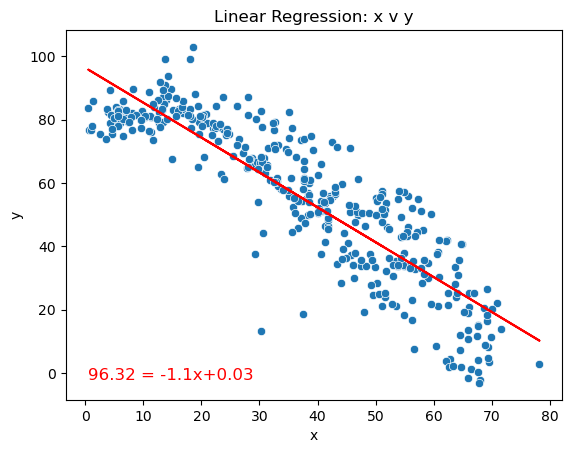

In [31]:
#Done
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                       title='Linear Regression: x v y', 
                       xlabel='x', ylabel='y')

The r-value is: 0.7161472181434118


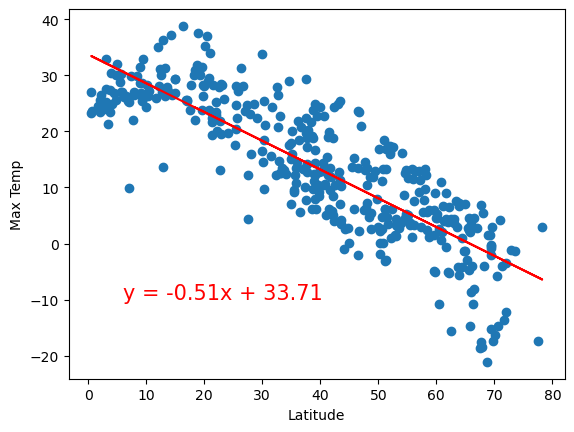

In [15]:
#Done
# Linear regression on Northern Hemisphere


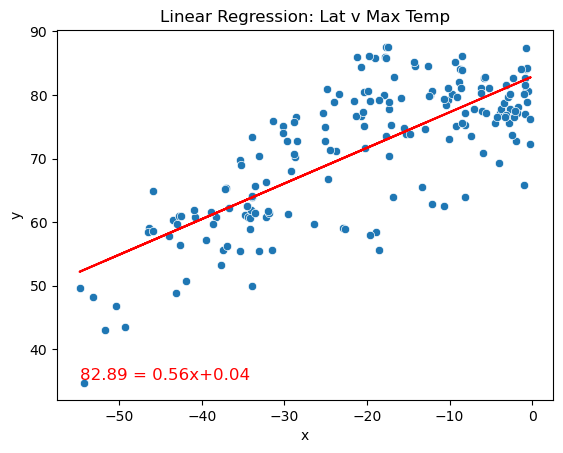

In [39]:
#Done
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
                       title='Linear Regression: Lat v Max Temp', 
                       xlabel='x', ylabel='y')

**Discussion about the linear relationship:** 

The first regression model does not fit the data.  The relationship is non-linear, and looks like it should be split out into two regression models, for instance.

Splitting between Northern and Southern Hemispheres shows that there is a linear relationship.  For some reason the Southen Hemisphere has dotts that are further away from the regression line than the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

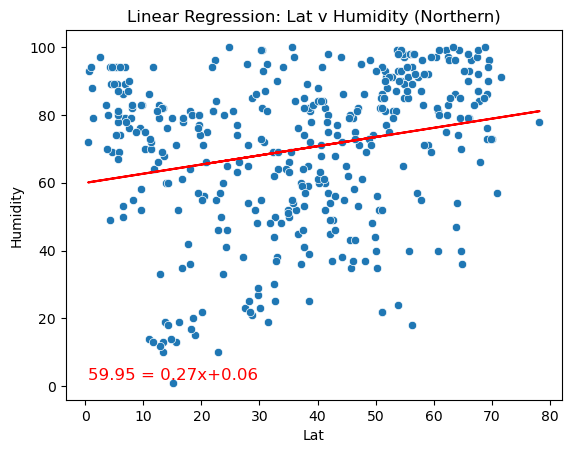

In [33]:
#Done
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                       title='Linear Regression: Lat v Humidity (Northern)', 
                       xlabel='Lat', ylabel='Humidity')

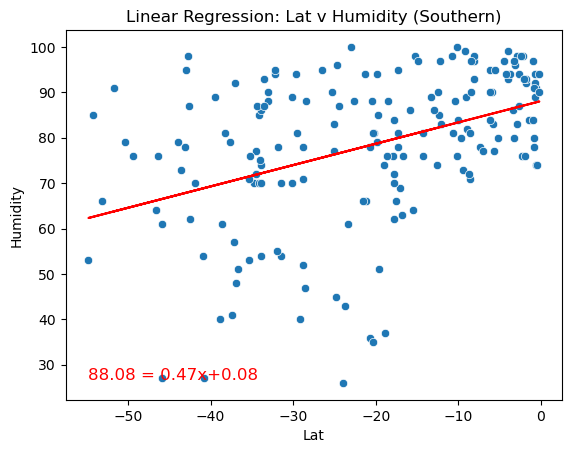

In [34]:
#Done
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
                       title='Linear Regression: Lat v Humidity (Southern)', 
                       xlabel='Lat', ylabel='Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

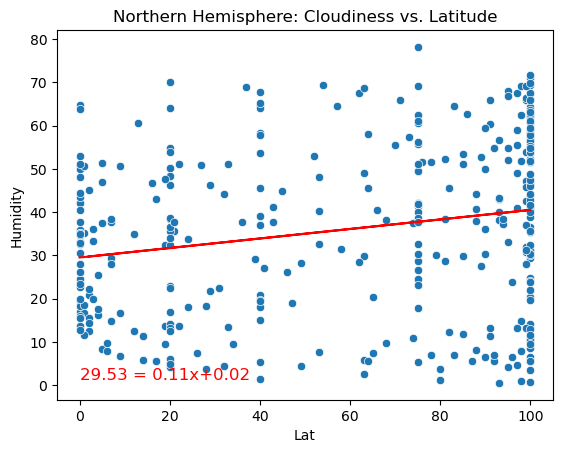

In [35]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Cloudiness'], northern_hemi_df['Lat'], 
                       title='Northern Hemisphere: Cloudiness vs. Latitude', 
                       xlabel='Lat', ylabel='Humidity')

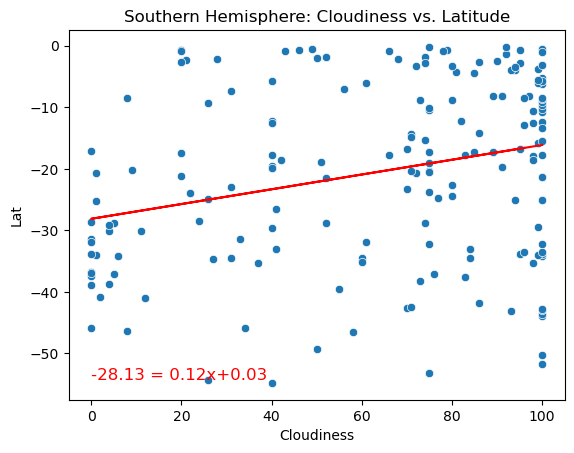

In [36]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Cloudiness'], southern_hemi_df['Lat'], 
                       title='Southern Hemisphere: Cloudiness vs. Latitude', 
                       xlabel='Cloudiness', ylabel='Lat')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

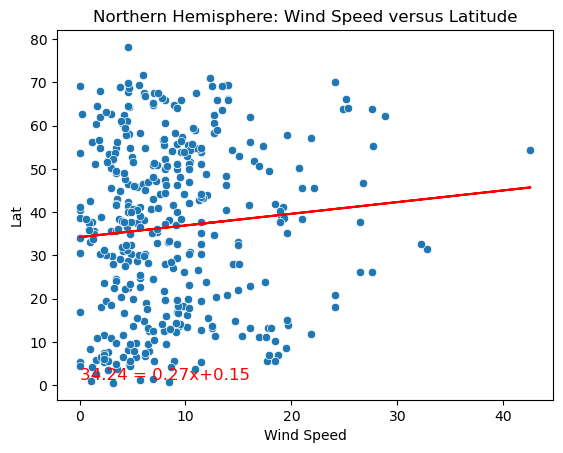

In [37]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Wind Speed'], northern_hemi_df['Lat'], 
                       title='Northern Hemisphere: Wind Speed versus Latitude', 
                       xlabel='Wind Speed', ylabel='Lat')

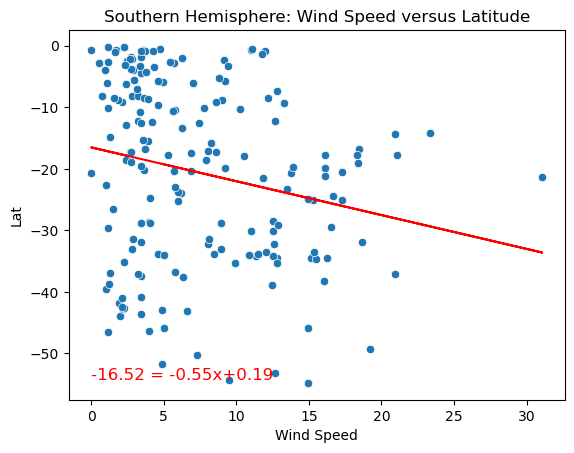

In [38]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Wind Speed'], southern_hemi_df['Lat'], 
                       title='Southern Hemisphere: Wind Speed versus Latitude', 
                       xlabel='Wind Speed', ylabel='Lat')

**Discussion about the linear relationship:** YOUR RESPONSE HERE